In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
x = iris.data[:, :2]
y = iris.target

## LogisticRegression()

In [6]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial", C=10, random_state=42)
softmax_reg.fit(x, y)
softmax_reg.intercept_, softmax_reg.coef_


(array([ 13.81810643,  -0.51519673, -13.3029097 ]),
 array([[-5.10003926,  4.5761252 ],
        [ 1.65072691, -2.55845886],
        [ 3.44931235, -2.01766635]]))

In [7]:
softmax_reg.score(x, y)

0.8333333333333334

In [8]:
x_new = [[6.7, 4.25], [4.9, 3.3], [5.2, 2.5]]
softmax_reg.predict(x_new)

array([2, 0, 1])

In [9]:
softmax_reg.predict_proba(x_new)

array([[8.89475199e-02, 1.58047310e-01, 7.53005171e-01],
       [9.90920309e-01, 8.16582501e-03, 9.13866077e-04],
       [4.51484756e-02, 8.49100249e-01, 1.05751275e-01]])

## SGDClassifier()

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, random_state=42)

sgd_clf.fit(x, y)
sgd_clf.intercept_, sgd_clf.coef_

(array([ 16.63237437,  24.7871546 , -45.82217829]),
 array([[-9.86265004, 11.97845366],
        [-1.01343948, -8.50829633],
        [ 7.48734523,  0.40735136]]))

In [14]:
sgd_clf.score(x, y)

0.72

In [15]:
x_new = [[6.7, 4.25], [4.9, 3.3], [5.2, 2.5]]
sgd_clf.predict(x_new)

array([2, 0, 1])

In [16]:
sgd_clf.predict_proba(x_new)

array([[4.48598557e-01, 7.15007618e-09, 5.51401436e-01],
       [9.99326867e-01, 2.59536325e-04, 4.13597004e-04],
       [5.61481248e-02, 9.26182567e-01, 1.76693083e-02]])

In [17]:
x1, x2 = np.meshgrid(
  np.linspace(4.2, 8, 1000).reshape(-1, 1),
  np.linspace(1.8, 4.5, 1000).reshape(-1, 1)
)

x_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = softmax_reg.predict(x_new)

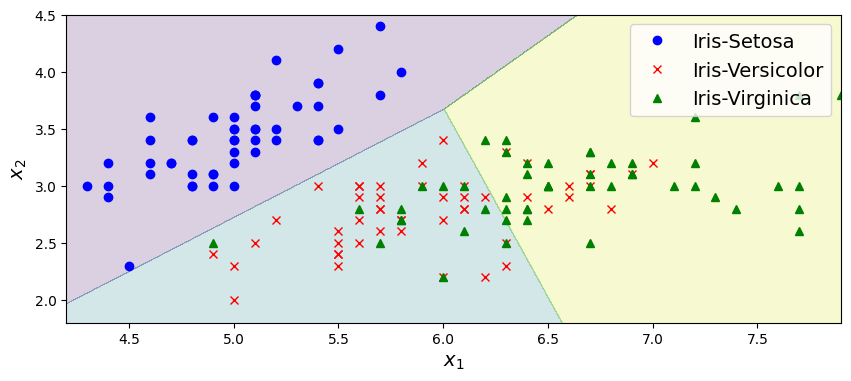

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(x[y==0, 0], x[y==0, 1], "bo", label="Iris-Setosa")
plt.plot(x[y==1, 0], x[y==1, 1], "rx", label="Iris-Versicolor")
plt.plot(x[y==2, 0], x[y==2, 1], "g^", label="Iris-Virginica")

zz = y_pred.reshape(x1.shape)
plt.contourf(x1, x2, zz, alpha=0.2)

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.legend(loc="upper right", fontsize=14)

plt.axis([4.2, 7.9, 1.8, 4.5])

plt.show()